In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
path="/content/gdrive/MyDrive/Colab_Notebooks/fraudTrain.csv"
path_1="/content/gdrive/MyDrive/Colab_Notebooks/fraudTest.csv"

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


Loading Dataset

In [5]:
df_2=pd.read_csv(path)
df_1=pd.read_csv(path_1)
df_1=df_1.drop(df_1.columns[0], axis=1)
df_2=df_2.drop(df_2.columns[0], axis=1)

In [6]:
df = pd.concat([df_2,df_1])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Checking datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

Checking NULL values

In [8]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df.shape

(1852394, 22)

Dependent Variables

In [11]:
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

,is_fraud,count,percentage
0,0,1842743,99.478999
1,1,9651,0.521001


We will be balancing the dependent variable due to imbalance in class data

In [12]:
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

Converting trans_date_trans_time to datetime

In [13]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [14]:
df.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

In [15]:
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_hour']

0          0
1          0
2          0
3          0
4          0
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: trans_hour, Length: 1852394, dtype: int64

In [16]:
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: day_of_week, Length: 1852394, dtype: object

In [17]:
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

0         2019-01
1         2019-01
2         2019-01
3         2019-01
4         2019-01
           ...   
555714    2020-12
555715    2020-12
555716    2020-12
555717    2020-12
555718    2020-12
Name: year_month, Length: 1852394, dtype: period[M]

Analysing trends in transactions

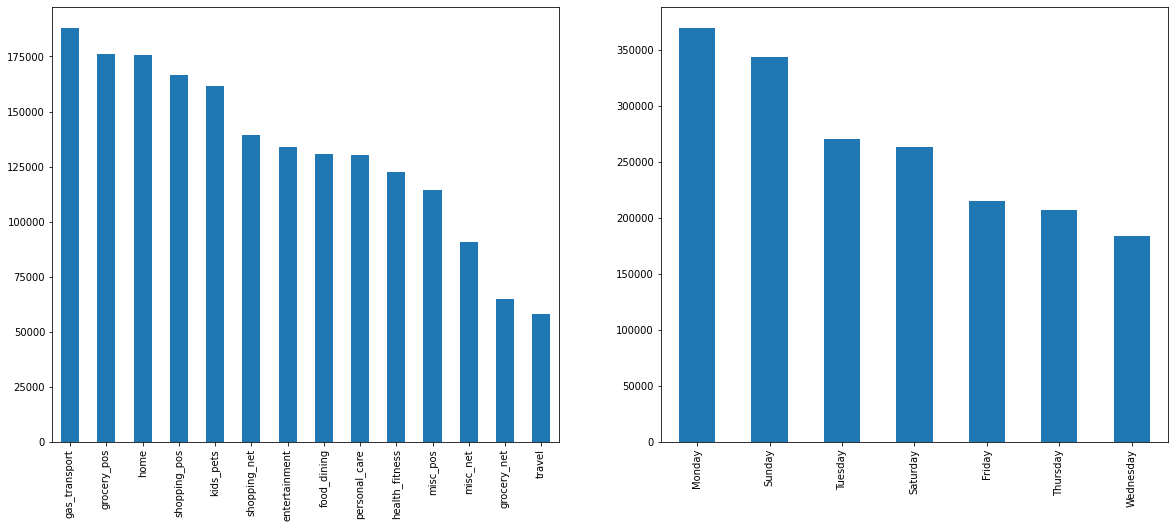

In [20]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['day_of_week'].value_counts().plot.bar();

There are higher transactions observed on Monday and Sunday

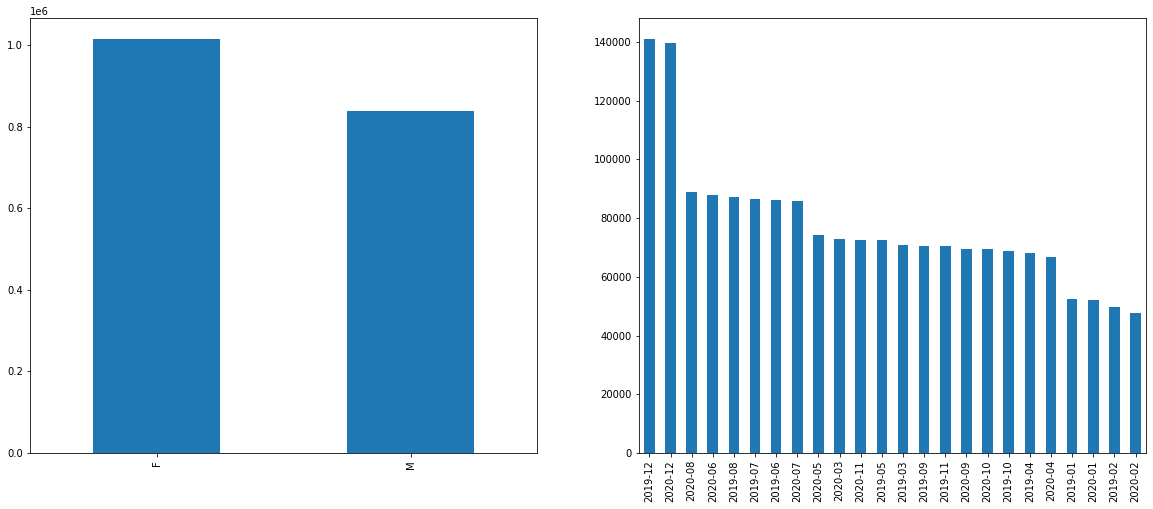

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['year_month'].value_counts().plot.bar();

Number of transactions are observed to increase during December and decrease during February.

In [23]:
df.state.value_counts(normalize=True)

TX    0.073024
NY    0.064467
PA    0.061635
CA    0.043455
OH    0.035968
MI    0.035535
IL    0.033585
FL    0.032809
AL    0.031592
MO    0.029639
MN    0.024527
AR    0.024083
NC    0.023286
VA    0.022542
WI    0.022532
SC    0.022528
KY    0.022123
IN    0.021345
IA    0.020948
OK    0.020541
MD    0.020160
GA    0.020158
WV    0.019720
NJ    0.018965
NE    0.018584
KS    0.017782
MS    0.016207
LA    0.016170
WY    0.014995
WA    0.014597
OR    0.014256
TN    0.013449
ME    0.012650
NM    0.012647
ND    0.011435
CO    0.010671
SD    0.009487
MA    0.009481
VT    0.009076
MT    0.009073
AZ    0.008293
UT    0.008290
NH    0.006331
CT    0.005927
NV    0.004350
ID    0.004338
DC    0.002769
HI    0.001970
AK    0.001600
RI    0.000402
DE    0.000005
Name: state, dtype: float64

In [24]:
df.job.value_counts(normalize=True,ascending=False)

Film/video editor             0.007503
Exhibition designer           0.007108
Surveyor, land/geomatics      0.006713
Naval architect               0.006712
Materials engineer            0.006322
                                ...   
Veterinary surgeon            0.000004
Engineer, water               0.000004
Contracting civil engineer    0.000004
Ship broker                   0.000004
Warehouse manager             0.000004
Name: job, Length: 497, dtype: float64

Calculating age of customer

In [26]:
df['dob'] = pd.to_datetime(df['dob'])

In [27]:
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))
df['age']

0         31.0
1         41.0
2         57.0
3         52.0
4         33.0
          ... 
555714    55.0
555715    21.0
555716    39.0
555717    55.0
555718    28.0
Name: age, Length: 1852394, dtype: float64

In [28]:
df['age'].describe()

count    1.852394e+06
mean     4.626617e+01
std      1.741239e+01
min      1.400000e+01
25%      3.300000e+01
50%      4.400000e+01
75%      5.700000e+01
max      9.600000e+01
Name: age, dtype: float64

50% of our customers belong in age bracket 33-57

Minimum age of customer is 14

Maximum age of customer is 96

Distribution of amount

In [29]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1.852394e+06,1.842743e+06,9651.000000
1,mean,7.006357e+01,6.765128e+01,530.661412
2,std,1.592540e+02,1.535481e+02,391.028873
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.745000e+01,4.724000e+01,390.000000
5,95%,1.953400e+02,1.895900e+02,1084.090000
6,99.9%,1.517241e+03,1.519623e+03,1293.127000
7,max,2.894890e+04,2.894890e+04,1376.040000


Fraud Transaction mean is way higher than non-fraud transaction

Mean of Non Fraud Transactions: 67.6

Mean of Fraud Transactions: 530.6

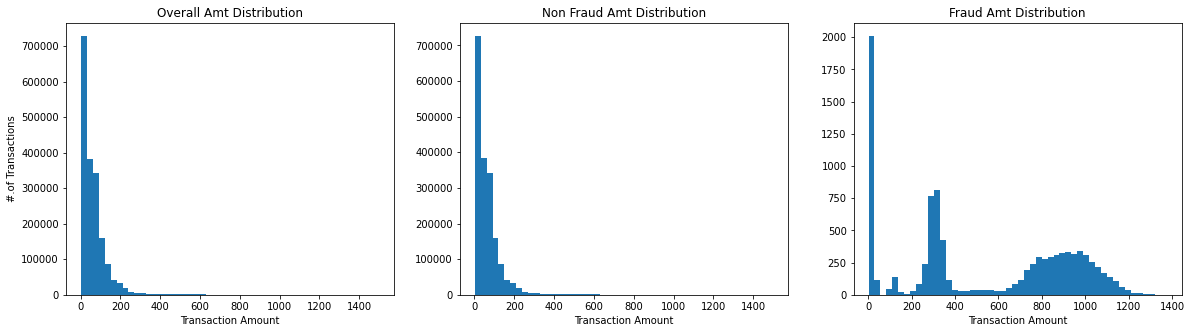

In [30]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df['amt']<=1500]['amt'], bins=50)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

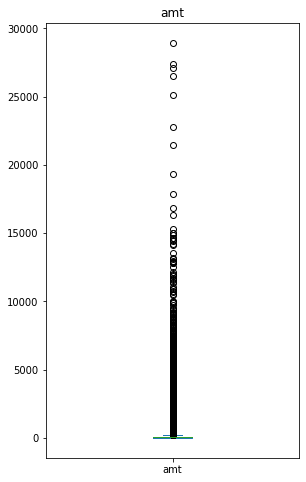

In [31]:
num_cols=['amt']
plt.figure(figsize=[10,8])
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    df[col].plot.box()
    plt.title(col)
plt.show()

Year Month vs Number of Transactions

In [32]:
df_timeline01 = df.groupby(df['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01

,year_month,num_of_transactions,customers
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910
5,2019-06,86064,908
6,2019-07,86596,910
7,2019-08,87359,911
8,2019-09,70652,913
9,2019-10,68758,912


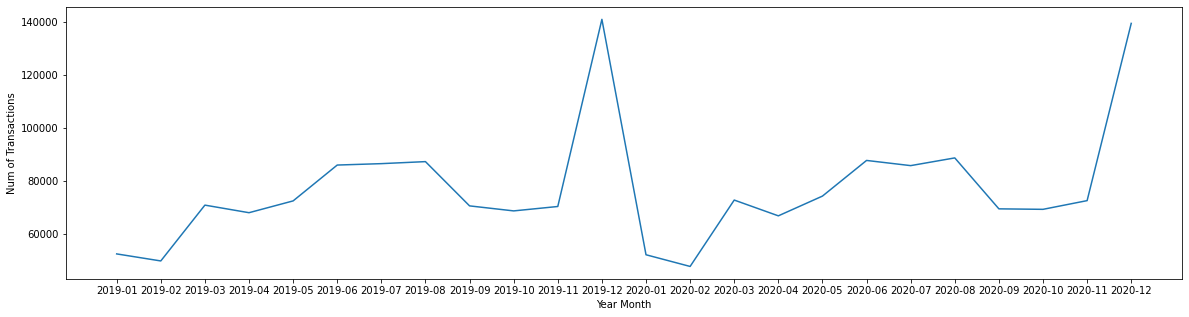

In [33]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

Year Month vs Number of Customers Done the Transactions

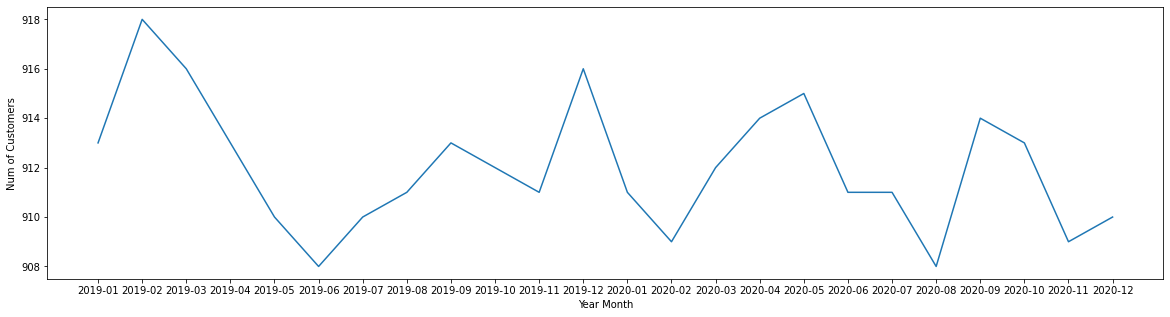

In [34]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

Fraud Transactions

In [35]:
df_fraud_transactions = df[df['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


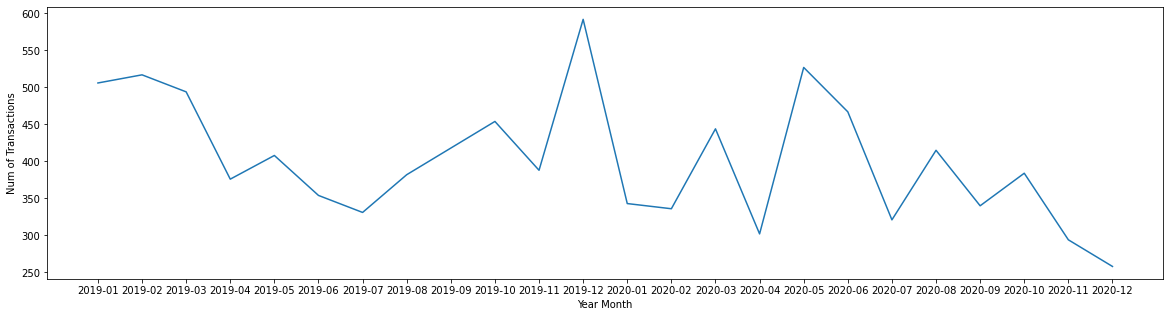

In [36]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

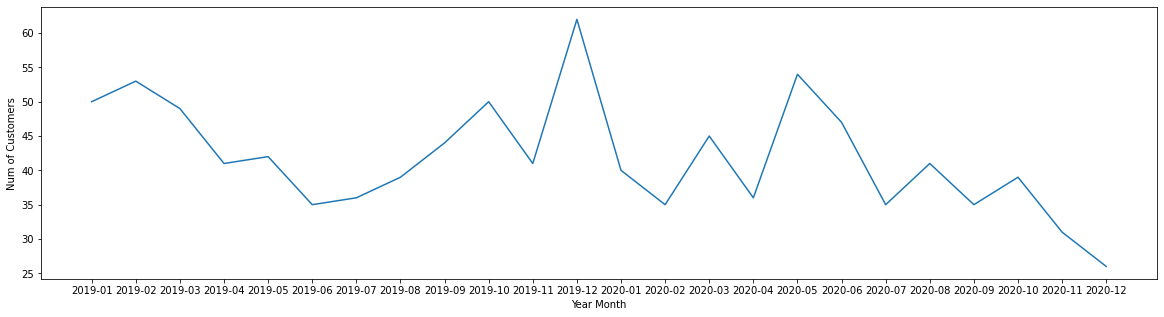

In [37]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()


Gender

In [38]:
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

,Gender,gender_count,percent
0,F,1014749,54.780408
1,M,837645,45.219592


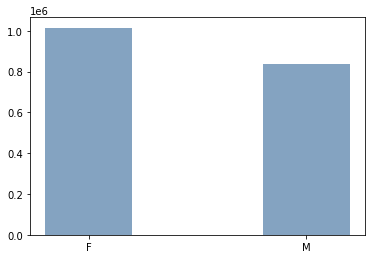

In [39]:
plt.bar(df_gender['Gender'], df_gender['gender_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

We can observe there are more Female customers than male

In [40]:
df_fraud_gender = df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

,Gender,is_fraud,count,gender_count,percent_grp
0,F,0,1009850,1014749,99.517221
1,F,1,4899,1014749,0.482779
2,M,0,832893,837645,99.432695
3,M,1,4752,837645,0.567305


Category

In [41]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

,Category,category_count,percent
2,gas_transport,188029,10.150594
4,grocery_pos,176191,9.511529
6,home,175460,9.472067
12,shopping_pos,166463,8.986371
7,kids_pets,161727,8.730702
11,shopping_net,139322,7.521186
0,entertainment,134118,7.240252
1,food_dining,130729,7.057300
10,personal_care,130085,7.022534
5,health_fitness,122553,6.615925


In [42]:
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category

,index,Category,category_count,percent
0,2,gas_transport,188029,10.150594
1,4,grocery_pos,176191,9.511529
2,6,home,175460,9.472067
3,12,shopping_pos,166463,8.986371
4,7,kids_pets,161727,8.730702
5,11,shopping_net,139322,7.521186
6,0,entertainment,134118,7.240252
7,1,food_dining,130729,7.057300
8,10,personal_care,130085,7.022534
9,5,health_fitness,122553,6.615925


gas_transport cateogry has 10% of total transactions

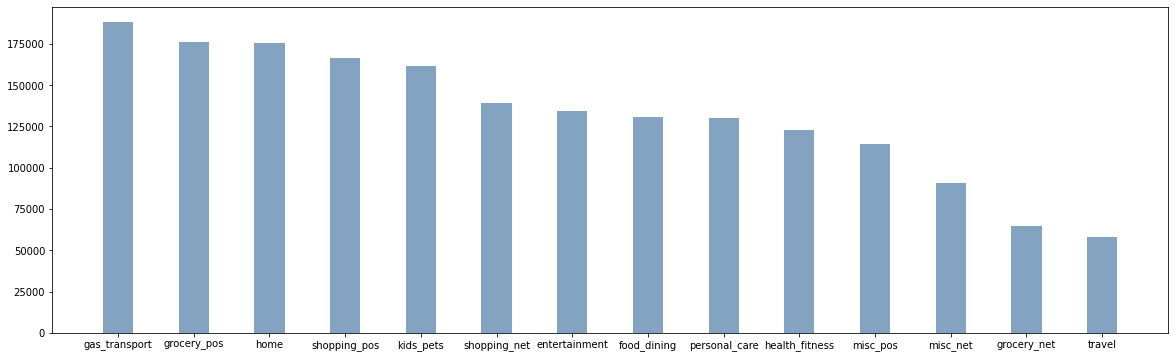

In [43]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_category['Category'], df_category['category_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [44]:
df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100

In [45]:
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

,Category,is_fraud,count,category_count,percent,percent_grp
4,gas_transport,0,187257,188029,10.150594,99.589425
5,gas_transport,1,772,188029,10.150594,0.410575
8,grocery_pos,0,173963,176191,9.511529,98.735463
9,grocery_pos,1,2228,176191,9.511529,1.264537
13,home,1,265,175460,9.472067,0.151032
12,home,0,175195,175460,9.472067,99.848968
25,shopping_pos,1,1056,166463,8.986371,0.634375
24,shopping_pos,0,165407,166463,8.986371,99.365625
14,kids_pets,0,161423,161727,8.730702,99.812029
15,kids_pets,1,304,161727,8.730702,0.187971


In [46]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

,Category,is_fraud,count,category_count,percent,percent_grp
11,health_fitness,1,185,122553,6.615925,0.150955
13,home,1,265,175460,9.472067,0.151032
3,food_dining,1,205,130729,7.057300,0.156813
15,kids_pets,1,304,161727,8.730702,0.187971
1,entertainment,1,292,134118,7.240252,0.217719
21,personal_care,1,290,130085,7.022534,0.222931
27,travel,1,156,57956,3.128708,0.269170
7,grocery_net,1,175,64878,3.502387,0.269737
19,misc_pos,1,322,114229,6.166561,0.281890
5,gas_transport,1,772,188029,10.150594,0.410575


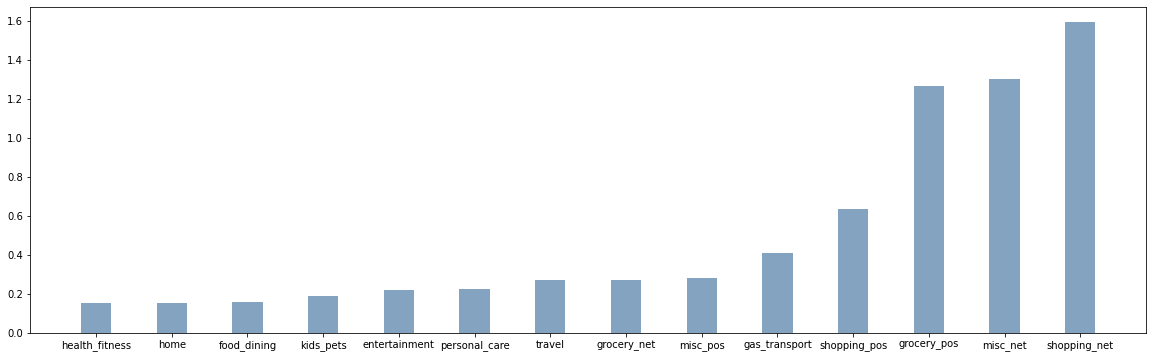

In [47]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_fraud['Category'] , df_fraud['percent_grp'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

Merchant

In [48]:
df.merchant.value_counts(normalize=True, ascending=False)

fraud_Kilback LLC                        0.003380
fraud_Cormier LLC                        0.002832
fraud_Schumm PLC                         0.002804
fraud_Kuhn LLC                           0.002716
fraud_Boyer PLC                          0.002699
                                           ...   
fraud_Douglas, DuBuque and McKenzie      0.000594
fraud_Treutel-King                       0.000593
fraud_Satterfield-Lowe                   0.000591
fraud_Hahn, Douglas and Schowalter       0.000589
fraud_Ritchie, Bradtke and Stiedemann    0.000588
Name: merchant, Length: 693, dtype: float64

In [49]:
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

,Merchant,merchant_count,percent
316,fraud_Kilback LLC,6262,0.338049
105,fraud_Cormier LLC,5246,0.283201
571,fraud_Schumm PLC,5195,0.280448
349,fraud_Kuhn LLC,5031,0.271594
70,fraud_Boyer PLC,4999,0.269867
...,...,...,...
143,"fraud_Douglas, DuBuque and McKenzie",1101,0.059437
633,fraud_Treutel-King,1098,0.059275
544,fraud_Satterfield-Lowe,1095,0.059113
221,"fraud_Hahn, Douglas and Schowalter",1091,0.058897


In [50]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [51]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

,Merchant,is_fraud,count,merchant_count,percent,percent_grp
673,fraud_Kozey-Boehm,1,60,2758,0.148888,2.175489
490,"fraud_Herman, Treutel and Dickens",1,38,1870,0.100950,2.032086
1226,fraud_Terry-Huel,1,56,2864,0.154611,1.955307
607,fraud_Kerluke-Abshire,1,50,2635,0.142248,1.897533
884,"fraud_Mosciski, Ziemann and Farrell",1,53,2821,0.152289,1.878766
...,...,...,...,...,...,...
775,"fraud_Lesch, D'Amore and Brown",1,1,2659,0.143544,0.037608
1089,"fraud_Schaefer, Fay and Hilll",1,1,2664,0.143814,0.037538
950,"fraud_Parker, Nolan and Trantow",1,1,2795,0.150886,0.035778
1335,fraud_Windler LLC,1,1,3170,0.171130,0.031546


One-Hot encoding

In [52]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='week',drop_first=True)

In [53]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [54]:
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [55]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [56]:
df1['dist'] = \
    haversine(df1['lat'], df1['long'],
                 df1['merch_lat'], df1['merch_long'])

In [57]:
df1['dist'].describe()

count    1.852394e+06
mean     7.611173e+01
std      2.911697e+01
min      2.225452e-02
25%      5.532009e+01
50%      7.821638e+01
75%      9.850947e+01
max      1.521172e+02
Name: dist, dtype: float64

In [58]:
df1.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
trans_hour                          int64
day_of_week                       

Historic Variables

In [59]:
df1.index = pd.to_datetime(df1['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time_index'})
df1 = df1.sort_index()
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist
time_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744


In [60]:
df1['val_for_agg'] = 1

In [61]:
df_hist_trans_60d = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [62]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [63]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [64]:
df_hist_trans_60d.head()

,cc_num,trans_date,hist_trans_60d
0,60416207185,2019-01-01,0.0
1,60416207185,2019-01-02,1.0
2,60416207185,2019-01-03,5.0
3,60416207185,2019-01-04,7.0
4,60416207185,2019-01-05,9.0


24 hours order by customer

In [65]:
df_hist_orders_24h = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [66]:
df_hist_orders_24h.head()

,cc_num,trans_date_trans_time,hist_trans_24h
0,60416207185,2019-01-01 12:47:15,0.0
1,60416207185,2019-01-02 08:44:57,1.0
2,60416207185,2019-01-02 08:47:36,2.0
3,60416207185,2019-01-02 12:38:14,3.0
4,60416207185,2019-01-02 13:10:46,4.0


24 hrs fraud historic transactions

In [67]:
df_hist_fraud_trans_24h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

In [68]:
df_hist_fraud_trans_24h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_24h
0,60416207185,2019-03-01 01:32:53,0.0
1,60416207185,2019-03-01 02:42:25,1.0
2,60416207185,2019-03-01 23:06:58,2.0
3,60416207185,2019-03-02 22:10:38,3.0
4,60416207185,2019-03-02 22:10:59,2.0


In [ ]:
2 hrs fraud by customers

In [69]:
df_hist_fraud_trans_2h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

In [70]:
df_hist_fraud_trans_2h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_2h
0,60416207185,2019-03-01 01:32:53,0.0
1,60416207185,2019-03-01 02:42:25,1.0
2,60416207185,2019-03-01 23:06:58,2.0
3,60416207185,2019-03-02 22:10:38,1.0
4,60416207185,2019-03-02 22:10:59,1.0


60 Day Orders Amt Avg by Customers

In [71]:
df_hist_trans_amt_avg_60d = \
    df1 \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [72]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date

In [73]:
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()

In [74]:
df_hist_trans_amt_avg_60d.head(10)

,cc_num,trans_date,hist_trans_avg_amt_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,7.270000
2,60416207185,2019-01-03,35.188333
3,60416207185,2019-01-04,31.365714
4,60416207185,2019-01-05,40.378889
5,60416207185,2019-01-06,43.053636
6,60416207185,2019-01-07,48.005000
7,60416207185,2019-01-08,60.016154
8,60416207185,2019-01-09,70.423125
9,60416207185,2019-01-10,69.753889


Merge Historical Variables with Transactions by 'cc_num','trans_date_trans_time'

In [75]:
df1['trans_date'] = df1['trans_date_trans_time'].dt.date

In [76]:
df2 = df1.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [77]:
df2 = df2.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [78]:
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

In [79]:
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568,1,2019-01-01,1.0,6.0,0.0,0.0,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176,1,2019-01-01,1.0,1.0,0.0,0.0,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083,1,2019-01-01,8.0,5.0,0.0,0.0,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231,1,2019-01-01,1.0,5.0,0.0,0.0,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744,1,2019-01-01,1.0,6.0,0.0,0.0,41.960000


In [80]:
df2['hist_fraud_trans_24h'] = df2['hist_fraud_trans_24h'] - df2['hist_fraud_trans_2h']

In [81]:
cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d','is_fraud']

In [82]:
corr = df2[cols].corr()

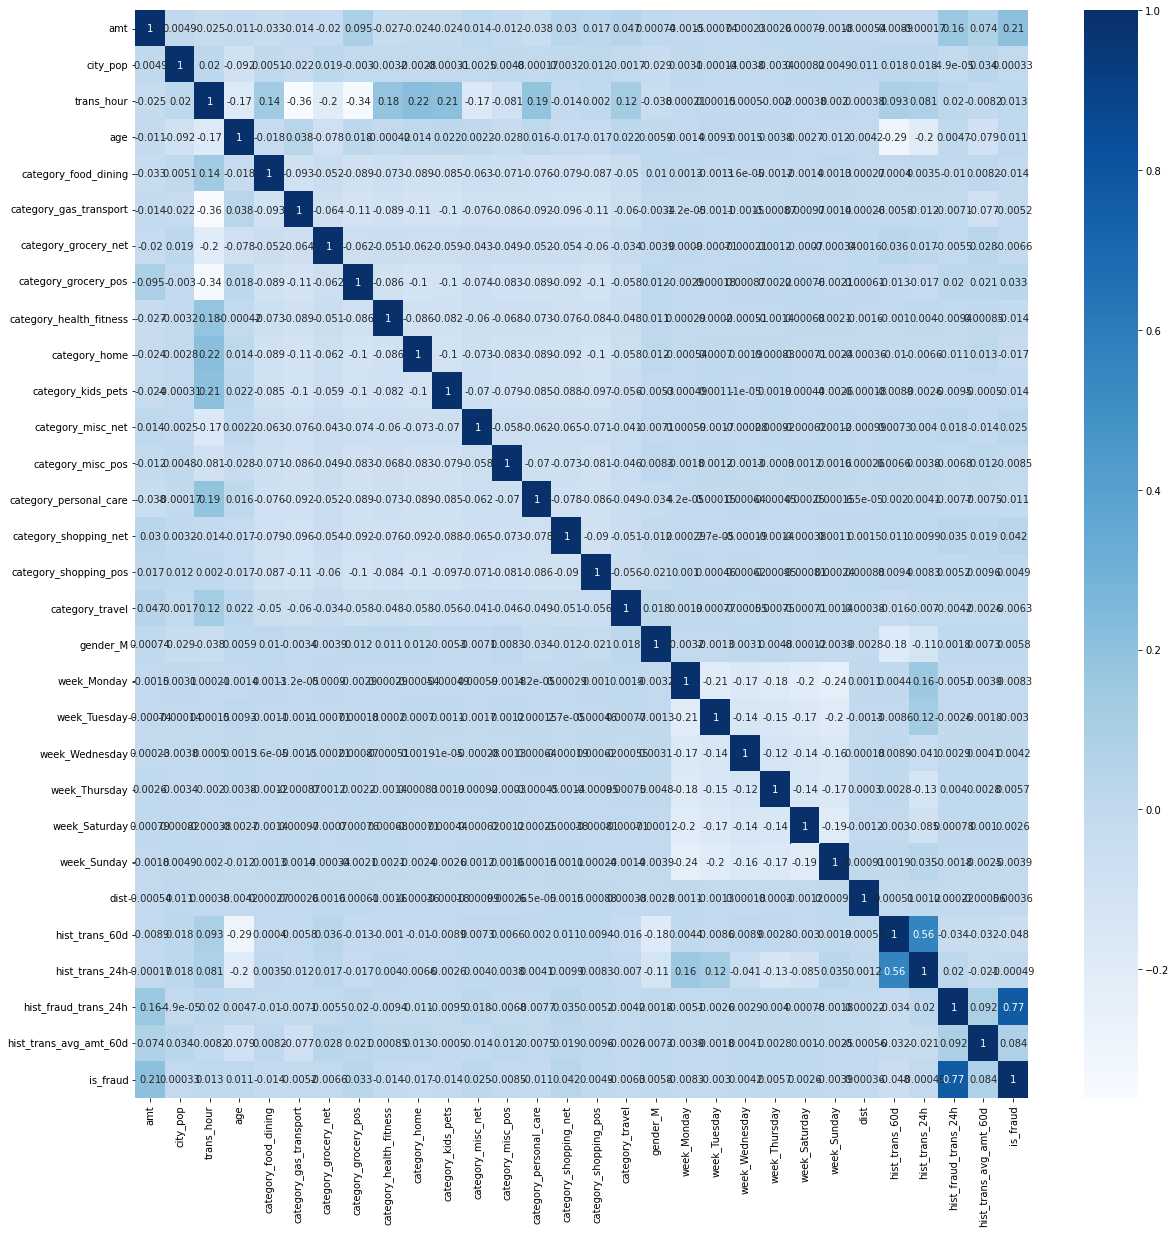

In [85]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corr, annot=True,cmap='Blues')
plt.show()

hist_fraud_trans_24h is highly correlated with is_fraud - 0.77

hist_trans_24h is also correlated with hist_trans_60d - 0.56

DATA VISUALISATIONS with plotly

In [86]:
import plotly
import plotly.graph_objects as go 

In [87]:
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568,1,2019-01-01,1.0,6.0,0.0,0.0,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176,1,2019-01-01,1.0,1.0,0.0,0.0,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083,1,2019-01-01,8.0,5.0,0.0,0.0,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231,1,2019-01-01,1.0,5.0,0.0,0.0,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744,1,2019-01-01,1.0,6.0,0.0,0.0,41.960000


In [88]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [89]:
df_job = df[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns = ['Job','tran_count_by_job']

df_job['percent'] = (df_job['tran_count_by_job']/df_job['tran_count_by_job'].sum())*100

df_job.sort_values(by = ['percent'], ascending=False)

,Job,tran_count_by_job,percent
194,Film/video editor,13898,0.750272
188,Exhibition designer,13167,0.710810
442,"Surveyor, land/geomatics",12436,0.671347
309,Naval architect,12434,0.671239
287,Materials engineer,11711,0.632209
...,...,...,...
175,"Engineer, water",8,0.000432
485,Veterinary surgeon,8,0.000432
490,Warehouse manager,7,0.000378
423,Ship broker,7,0.000378


In [90]:
df_fraud_job = df[['job','is_fraud','trans_num']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns = ['Job','is_fraud','count']

df_fraud_job =  df_fraud_job.merge(df_job[['Job','tran_count_by_job','percent']],how='inner',\
                                  left_on='Job',right_on='Job')


df_fraud_job['percent_grp'] = (df_fraud_job['count']/df_fraud_job['tran_count_by_job'])*100

In [91]:
job_plt_data = df_fraud_job.sort_values(by = ["tran_count_by_job"], ascending = False).head(20)

In [92]:
job_plt_data

,Job,is_fraud,count,tran_count_by_job,percent,percent_grp
378,Film/video editor,1,52,13898,0.750272,0.374155
377,Film/video editor,0,13846,13898,0.750272,99.625845
366,Exhibition designer,1,51,13167,0.710810,0.387332
365,Exhibition designer,0,13116,13167,0.710810,99.612668
861,"Surveyor, land/geomatics",0,12386,12436,0.671347,99.597941
862,"Surveyor, land/geomatics",1,50,12436,0.671347,0.402059
603,Naval architect,1,66,12434,0.671239,0.530803
602,Naval architect,0,12368,12434,0.671239,99.469197
559,Materials engineer,1,62,11711,0.632209,0.529417
558,Materials engineer,0,11649,11711,0.632209,99.470583


In [93]:
job_plt_data['label'] = 'Not Fraud'
job_plt_data.loc[job_plt_data['is_fraud']==1,['label']]= 'Fraud'
job_plt_data

,Job,is_fraud,count,tran_count_by_job,percent,percent_grp,label
378,Film/video editor,1,52,13898,0.750272,0.374155,Fraud
377,Film/video editor,0,13846,13898,0.750272,99.625845,Not Fraud
366,Exhibition designer,1,51,13167,0.710810,0.387332,Fraud
365,Exhibition designer,0,13116,13167,0.710810,99.612668,Not Fraud
861,"Surveyor, land/geomatics",0,12386,12436,0.671347,99.597941,Not Fraud
862,"Surveyor, land/geomatics",1,50,12436,0.671347,0.402059,Fraud
603,Naval architect,1,66,12434,0.671239,0.530803,Fraud
602,Naval architect,0,12368,12434,0.671239,99.469197,Not Fraud
559,Materials engineer,1,62,11711,0.632209,0.529417,Fraud
558,Materials engineer,0,11649,11711,0.632209,99.470583,Not Fraud


In [94]:
ne_grp = job_plt_data['Job'].unique()
print(ne_grp)

rm_grp = job_plt_data['label'].unique()
print(rm_grp)

['Film/video editor' 'Exhibition designer' 'Surveyor, land/geomatics'
 'Naval architect' 'Materials engineer' 'Designer, ceramics/pottery'
 'Environmental consultant' 'Financial adviser' 'Systems developer'
 'IT trainer']
['Fraud' 'Not Fraud']


In [96]:
fig = go.Figure(data=[
    go.Bar(name=rm_grp[0], x = ne_grp, y = job_plt_data[job_plt_data['label'] == rm_grp[0]]['percent_grp']),
    #go.Bar(name=rm_grp[1], x = ne_grp, y = job_plt_data[job_plt_data['label'] == rm_grp[1]]['percent_grp'])
])
# Change the bar mode
fig.update_layout(xaxis_title="Job Group "\
                  ,yaxis_title="Fraud Percent of Listings")
fig.show()

Dashboard to Understand the Transaction Amt Distribution

In [ ]:
from ipywidgets import interact
fig = go.FigureWidget()
scatt = fig.add_histogram()

xs = df2
@interact(state = df2['state'].unique(), \
          gender = df2['gender'].unique(),\
          age = (14,100,5),
          is_fraud = [0,1])

def update(state = 'NC',gender = 'M', age = 14,is_fraud=1):
    with fig.batch_update():
        scatt = df2[(df2['state'] == state) \
                   & (df2['gender'] == gender) \
                   & (df2['age'] >= age) \
                   & (df2['is_fraud'] == is_fraud)]['amt']
        fig.data[0].x=scatt
fig.update_layout(xaxis_title="Number of transaction"
                  ,yaxis_title="Transaction amount")

Plotting Fraud transactions in map

In [99]:
dftemp_fraud = df2[df2['is_fraud'] == 1]
fig = go.Figure()
fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = dftemp_fraud['long'],
        lat = dftemp_fraud['lat'],
        #text = df_sub['text'],
        marker = dict(
            #size = df_sub['total_cases']/scale,
            color = dftemp_fraud['is_fraud'],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = 'MAP'))
fig.update_layout( title_text = 'MAP',
                 geo = dict(
                     landcolor = 'rgb(217,217,217)',),
                  mapbox_style="open-street-map"
                 )

In [100]:
import plotly.express as px 

df2_fraud = df2[df2['is_fraud'] == 1]

fig = px.scatter_mapbox(df2_fraud, lat="lat", lon="long", hover_name="city",
                         zoom=3, height=500,
                         color="is_fraud",  color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Test-Train Split

In [101]:
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d'] #,

Y_cols = ['is_fraud']

In [102]:
from sklearn.model_selection import train_test_split

Oversampling

In [103]:
cnt_non_fraud = df2[df2['is_fraud'] == 0]['amt'].count()
df2_class_fraud = df2[df2['is_fraud'] == 1]
df2_class_nonfraud = df2[df2['is_fraud'] == 0]

In [104]:
df2_class_fraud_oversample = df2_class_fraud.sample(cnt_non_fraud, replace=True)
df2_oversampled = pd.concat([df2_class_nonfraud, df2_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df2_oversampled['is_fraud'].value_counts())

Random over-sampling:
0    1842831
1    1842831
Name: is_fraud, dtype: int64


In [105]:
df2_oversampled.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568,1,2019-01-01,1.0,6.0,0.0,0.0,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176,1,2019-01-01,1.0,1.0,0.0,0.0,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083,1,2019-01-01,8.0,5.0,0.0,0.0,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231,1,2019-01-01,1.0,5.0,0.0,0.0,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744,1,2019-01-01,1.0,6.0,0.0,0.0,41.960000


In [106]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df2_oversampled[X_cols],df2_oversampled[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)

In [107]:
X_train.shape

(2579963, 29)

In [108]:
X_test.shape

(1105699, 29)

Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
logreg = LogisticRegression(random_state=42)

In [111]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(random_state=42)

In [112]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [114]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[1199895   90113]
 [ 314043  975912]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86   1290008
           1       0.92      0.76      0.83   1289955

    accuracy                           0.84   2579963
   macro avg       0.85      0.84      0.84   2579963
weighted avg       0.85      0.84      0.84   2579963



In [115]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[514486  38337]
 [134489 418387]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86    552823
           1       0.92      0.76      0.83    552876

    accuracy                           0.84   1105699
   macro avg       0.85      0.84      0.84   1105699
weighted avg       0.85      0.84      0.84   1105699



Logistoic Regression model results:
Training data:

Accuracy - 84%

recall - 76%

Testing data:

Accuracy - 84%

recall - 76%

Decision Tree Model

In [117]:
#Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

Decision Tree Model Evaluation

In [118]:
print("Train Results")
pred_train = dt_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results
[[1288452    1556]
 [      0 1289955]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290008
           1       1.00      1.00      1.00   1289955

    accuracy                           1.00   2579963
   macro avg       1.00      1.00      1.00   2579963
weighted avg       1.00      1.00      1.00   2579963



In [119]:
print("Test Results")
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results
[[552021    802]
 [     0 552876]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552823
           1       1.00      1.00      1.00    552876

    accuracy                           1.00   1105699
   macro avg       1.00      1.00      1.00   1105699
weighted avg       1.00      1.00      1.00   1105699



Decision Tree model results:
Training data:

Accuracy - 100%

recall - 100%

Testing data:

Accuracy - 100%

recall - 100%

Conclusion
To conclude, Decision Tree and Random Forest are the best models as they have highest recall

Cost benifit Analysis

In [120]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1.852394e+06,1.842743e+06,9651.000000
1,mean,7.006357e+01,6.765128e+01,530.661412
2,std,1.592540e+02,1.535481e+02,391.028873
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.745000e+01,4.724000e+01,390.000000
5,95%,1.953400e+02,1.895900e+02,1084.090000
6,99.9%,1.517241e+03,1.519623e+03,1293.127000
7,max,2.894890e+04,2.894890e+04,1376.040000


In [121]:
#Fraud transaction per month 
df_timeline02

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


In [122]:
df_timeline02['num_of_fraud_transactions'].mean()

402.125

In [123]:
df_timeline01

,year_month,num_of_transactions,customers
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910
5,2019-06,86064,908
6,2019-07,86596,910
7,2019-08,87359,911
8,2019-09,70652,913
9,2019-10,68758,912


In [124]:
print(df_timeline01['num_of_transactions'].mean())

77183.08333333333


In [125]:
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

,is_fraud,count,percentage
0,0,1842743,99.478999
1,1,9651,0.521001


As shown above by our model, the dataset has 9651 fraudlent transactions and an average of 402.125 frauds per month.

Since our model has 100% recall, it means we are able to predict all the frauds.